In [1]:
'''
dataset - https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope
'''

'\ndataset - https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope\n'

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)


In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [5]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [6]:
# making g = 1 and h = 0
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [8]:
df['class'].value_counts()

1    12332
0     6688
Name: class, dtype: int64

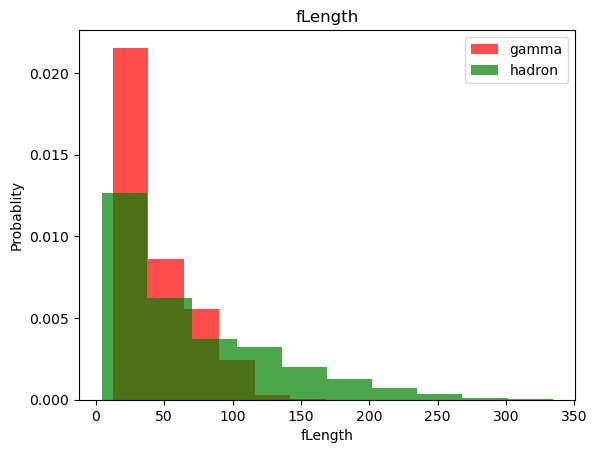

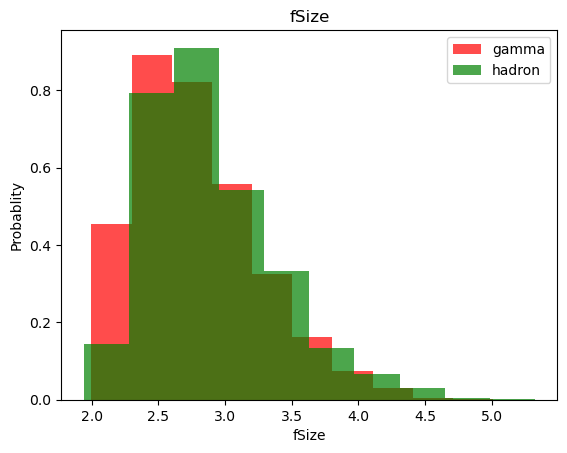

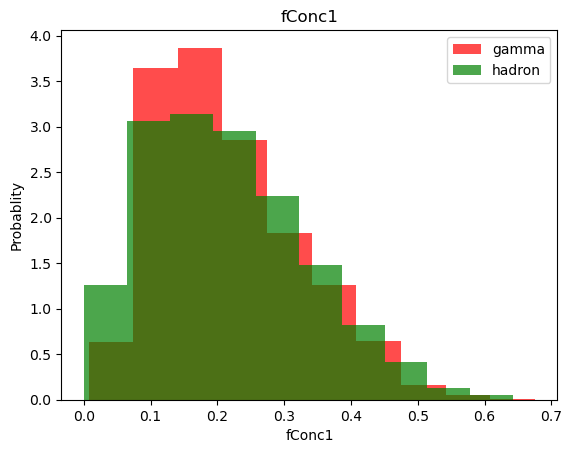

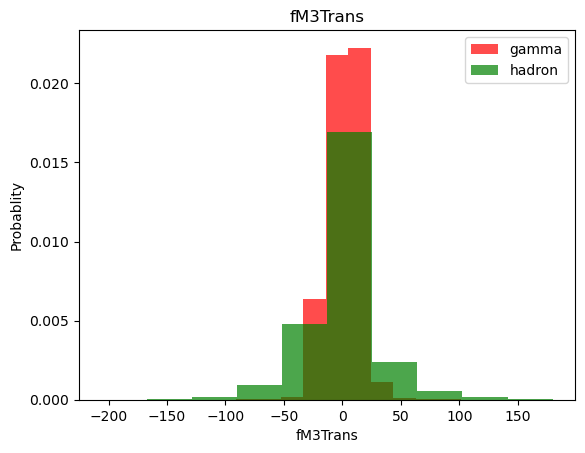

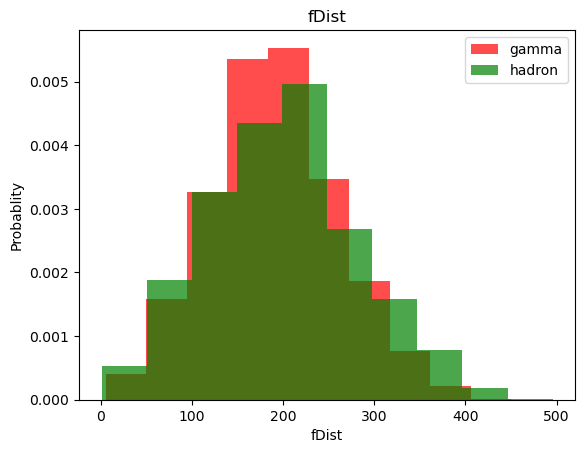

In [9]:
for eachCol in cols[:-1]:
    plt.hist(df[df["class"] == 1][eachCol], color='red', density=True, label='gamma', alpha=0.7)
    plt.hist(df[df["class"] == 0][eachCol], color='green', density=True, label='hadron', alpha=0.7)
    plt.title(eachCol)
    plt.ylabel('Probablity')
    plt.xlabel(eachCol)
    plt.legend()
    plt.show()

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def scale_dataset(df, over_sample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    
    if over_sample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
        
    return data, X, y

In [12]:
train, X_train, y_train = scale_dataset(df, over_sample=True)
valid, X_valid, y_valid = scale_dataset(valid, over_sample=False)
test, X_test, y_test = scale_dataset(test, over_sample=False)

In [13]:
# KNN


In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1360
           1       0.91      0.88      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.85      0.86      0.85      3804
weighted avg       0.87      0.86      0.86      3804



In [17]:
# Naive Bayes

In [18]:
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(X_train, y_train)

In [19]:
y_pred = gnb_model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      1360
           1       0.73      0.90      0.81      2444

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



In [21]:
#Logistic Regression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1360
           1       0.85      0.83      0.84      2444

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [24]:
# SVM

In [29]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1360
           1       0.86      0.88      0.87      2444

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804

